# Problem statement ->> Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow. Our main aim is to train the model in such a way that the model is able to predict whether it will rain on next day or not.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#importing necessary libraries

In [2]:
df=pd.read_csv(r"D:\Stuff\IMARTICUS\Python\Python Programming\weatherAUS.csv") 
# reading the data file

In [3]:
pd.set_option("display.max_columns", 22)
# to disply maximum columns

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.shape

(145460, 23)

# Data Preparation

# Data Cleaning part

In [7]:
cols_to_be_dropped = ['Date']
df = df.drop(cols_to_be_dropped, axis=1)
# Remove date column...

In [8]:
(df.isnull().sum()/len(df))*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [9]:
(df.isnull().sum()/len(df))*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

# Treating Null Values...

In [10]:
# As we see that there are null values, So we we impute them with help of mean and mode...

In [11]:
df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())
df.Rainfall = df.Rainfall.fillna(df.Rainfall.mean())
df.Evaporation = df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine = df.Sunshine.fillna(df.Sunshine.mean())
df.WindGustDir = df.WindGustDir.fillna('W')
df.WindGustSpeed = df.WindGustSpeed.fillna(df.WindGustSpeed.mean())
df.WindDir9am = df.WindDir9am.fillna('N')
df.WindDir3pm = df.WindDir3pm.fillna('SE')
df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.mean())
df.Pressure9am = df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm =df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am = df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am = df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.mean())
df.RainToday = df.RainToday.fillna('No')
df.RainTomorrow = df.RainTomorrow.fillna('No')
df.WindSpeed9am = df.WindSpeed9am.fillna(df.WindSpeed9am.mean())
df.WindSpeed3pm = df.WindSpeed3pm.fillna(df.WindSpeed3pm.mean())
df.Humidity3pm  = df.Humidity3pm.fillna(df.Humidity3pm.mean())

In [12]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
# Null values have been treated...

# Checking Outliers 

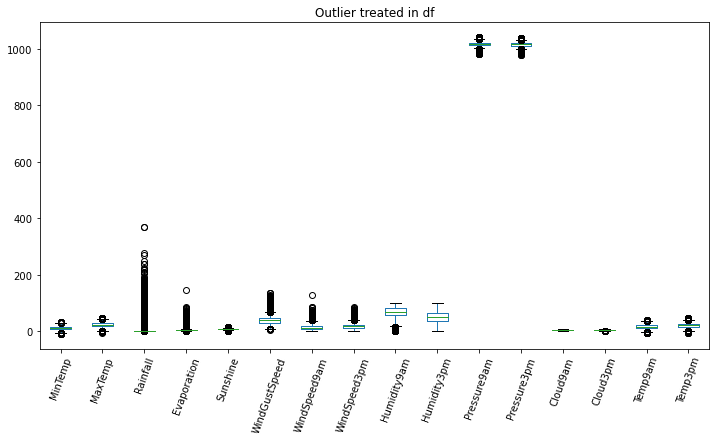

In [14]:
df.plot(kind='box',figsize=(12,6))
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

In [15]:
# As we can see that there are some outliers present in Rainfall column, Evaporation column and weedspeed9am column which are very less in number 
# So we can ignore them...

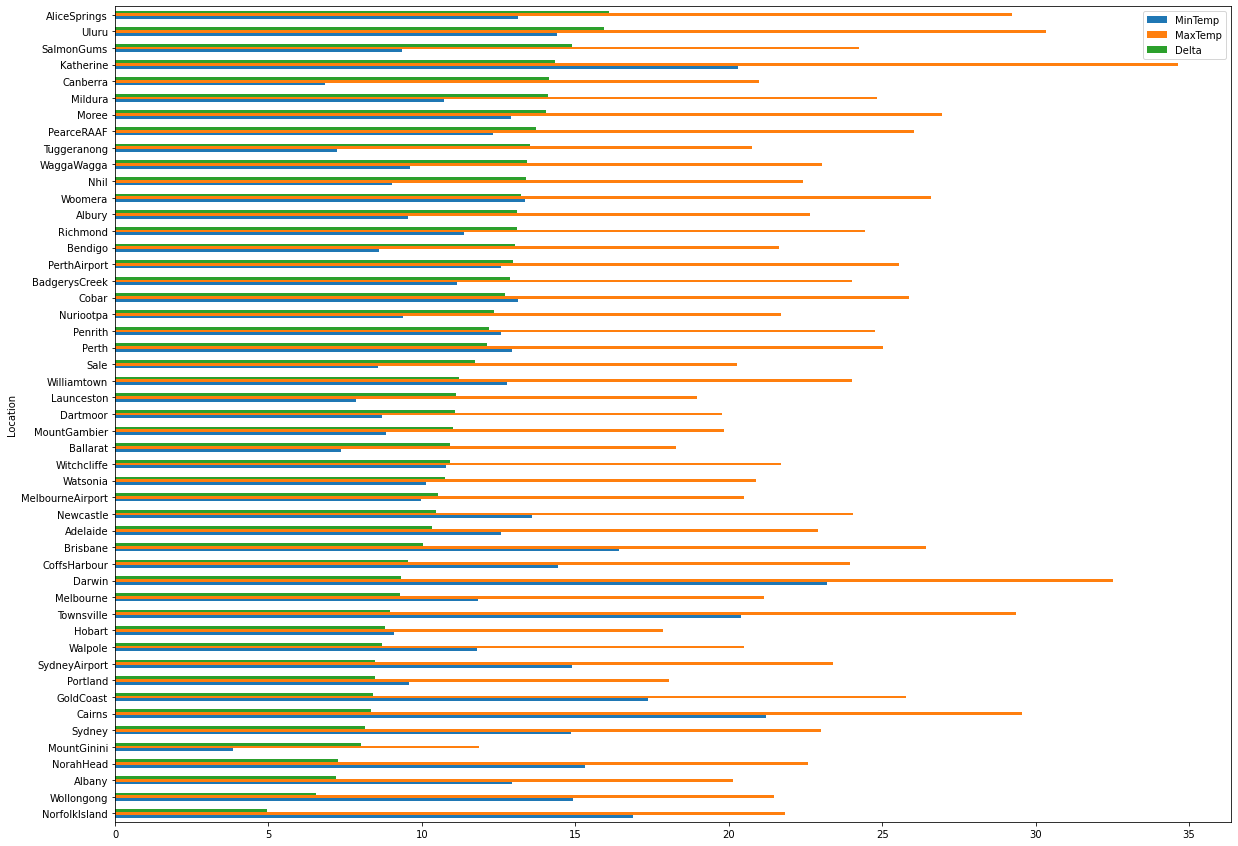

In [16]:
# Location analysis

#Our dataset isn’t huge, and only has a selection of . If we look at the average min/max temperatures
#and then take the largest spread, we see that the desert locations have the largest spread, whilst 
#coastal regions seem to be a bit more stable.

temp_avg = df.groupby(['Location']).mean()[['MinTemp', 'MaxTemp']]
temp_avg['Delta'] = temp_avg['MaxTemp'] - temp_avg['MinTemp']
temp_avg.sort_values(by='Delta', ascending=True).plot(kind='barh', figsize=(20,15))
plt.show()

# Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

# Checking skewness of data

In [19]:
df.skew()

Location         0.015406
MinTemp          0.021297
MaxTemp          0.221803
Rainfall         9.948369
Evaporation      4.989198
Sunshine        -0.688552
WindGustDir     -0.233645
WindGustSpeed    0.907477
WindDir9am       0.174355
WindDir3pm      -0.117402
WindSpeed9am     0.782396
WindSpeed3pm     0.634934
Humidity9am     -0.488445
Humidity3pm      0.034148
Pressure9am     -0.100891
Pressure3pm     -0.048178
Cloud9am        -0.291926
Cloud3pm        -0.294245
Temp9am          0.089083
Temp3pm          0.240968
RainToday        1.357739
RainTomorrow     1.357885
dtype: float64

In [20]:
# As we can see all skewness values range between between -1 to 1... So data se not skewed...   

# EDA

# 1)Target variable- RainTomorrow

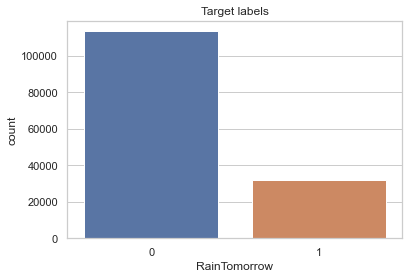

In [21]:
sns.set(style="whitegrid")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()

In [22]:
# As we can see from the plot that data is highly biased towards no value... So here we will do over-sampling...

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_train, df_test = train_test_split(df,test_size =.2)

In [25]:
df_train.RainTomorrow.value_counts()

0    90914
1    25454
Name: RainTomorrow, dtype: int64

In [26]:
df1 = df_train[df_train.RainTomorrow ==1]

In [27]:
df_train_new = pd.concat([df_train, df1], axis = 0)

In [28]:
df_train_new.RainTomorrow.value_counts()

0    90914
1    50908
Name: RainTomorrow, dtype: int64

In [29]:
# The problem of class imbalance has been solved now...

In [30]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
5,2,14.6,29.7,0.2,5.468232,7.611178,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,0,0
6,2,14.3,25.0,0.0,5.468232,7.611178,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,0,0
7,2,7.7,26.7,0.0,5.468232,7.611178,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,0,0
8,2,9.7,31.9,0.0,5.468232,7.611178,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,0,1
9,2,13.1,30.1,1.4,5.468232,7.611178,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,1,0


# 2)MinTemp

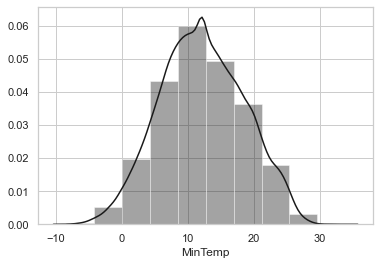

In [31]:
sns.distplot(df['MinTemp'],bins=10,color='k')

In [33]:
# The average of minimum temperature is around 12

# 3) MaxTemp

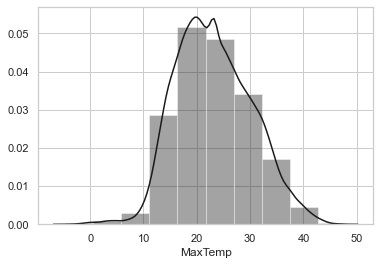

In [35]:
sns.distplot(df['MaxTemp'],bins=10,color='k')

In [37]:
# The average of minimum temperature is around 23

# 4) Rainfall

In [38]:
df.Rainfall.value_counts()
print(df[df['Rainfall'] <= 1.0]['Rainfall'].count())

110319


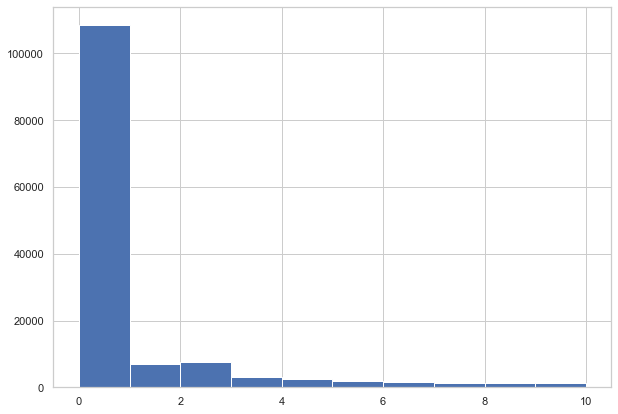

In [39]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df.Rainfall, bins = [0,1,2,3,4,5,6,7,8,9,10]) 

# Show plot 
plt.show() 

In [40]:
# the unit for rainfall column is mm. From above plot we observe that approx 110000 values are between 0 and 1mm which indicates 
# that amount of rainfall in Aus is very less. This also verifies the real life scenerio.

# 5)Evaporation

In [41]:
df.Evaporation.value_counts()

5.468232      62790
4.000000       3339
8.000000       2609
2.200000       2095
2.000000       2032
              ...  
145.000000        1
51.600000         1
33.200000         1
39.200000         1
38.600000         1
Name: Evaporation, Length: 359, dtype: int64

In [42]:
df.Evaporation.max()

145.0

In [43]:
df.Evaporation.min()

0.0

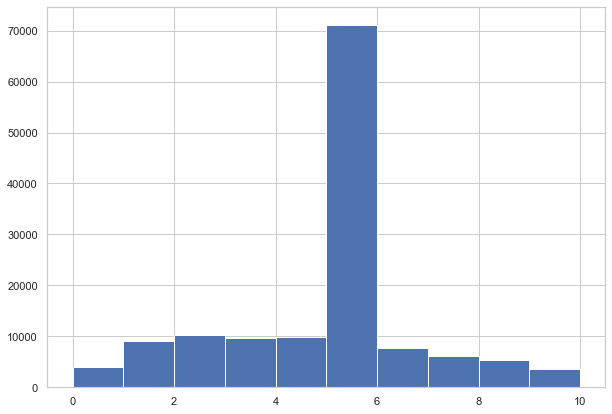

In [44]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df.Evaporation, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
  
# Show plot 
plt.show() 

In [45]:
# From above plot we observe that most of the evaporation values are clustered between 5mm and 6mm indicating that rainfall 
# in Aus for past 10 years has been quite less due to very low amount of evaporation...

In [46]:
df.shape

(145460, 22)

# Sampling

In [47]:
df_train_x = df_train_new.iloc[:, 0:21]
df_train_y = df_train_new.iloc[:,21]

df_test_x = df_test.iloc[:, 0:21]
df_test_y = df_test.iloc[:, 21]

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
logreg.fit(df_train_x, df_train_y)
pred_value = logreg.predict(df_test_x)
tab_lg = confusion_matrix(pred_value, df_test_y)
tab_lg

C:\Users\Gabru jawaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[19876,  2437],
       [ 2793,  3986]], dtype=int64)

In [51]:
Accuracy = tab_lg.diagonal().sum() / tab_lg.sum() * 100
Accuracy

82.0225491544067

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1 = f1_score(df_test_y, pred_value)
f1

0.6038479018330556

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
roc_score = roc_auc_score(pred_value, df_test_y)
roc_score

0.7393867441088637

In [56]:
# TPR & FPR 

# TPR = 0.87

#FPR = 0.36

# DT

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()

In [60]:
dt.fit(df_train_x, df_train_y)
pred_value = dt.predict(df_test_x)
tab_dt = confusion_matrix(pred_value, df_test_y)
tab_dt

array([[19550,  3078],
       [ 3119,  3345]], dtype=int64)

In [61]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum() * 100
Accuracy

78.69861130207617

In [62]:
f1 = f1_score(df_test_y, pred_value)
f1

0.5191278032125398

In [63]:
roc_score = roc_auc_score(pred_value, df_test_y)
roc_score

0.6907276366833697

In [ ]:
# TPR & FPR 

#TPR = 0.8614

#FPR = 0.48

# RF

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [65]:
rf.fit(df_train_x, df_train_y)
pred_value = rf.predict(df_test_x)
tab_rf = confusion_matrix(pred_value, df_test_y)
tab_rf

array([[21247,  2723],
       [ 1422,  3700]], dtype=int64)

In [66]:
Accuracy = tab_rf.diagonal().sum() / tab_rf.sum() * 100
Accuracy

85.75209679637014

In [67]:
f1 = f1_score(df_test_y, pred_value)
f1

0.6409701169337375

In [68]:
roc_score = roc_auc_score(pred_value, df_test_y)
roc_score

0.8043868694386792

In [ ]:
#TPR & FPR

#TPR = 0.93

#FPR = 0.42

In [ ]:
# XGBOOST

In [69]:
import xgboost as xgb
from xgboost import XGBClassifier

In [70]:
model = XGBClassifier()
model.fit(df_train_x, df_train_y)

C:\Users\Gabru jawaan\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
pred_xgbc = model.predict(df_test_x)

In [72]:
tab_xgbc = confusion_matrix(pred_xgbc, df_test_y)
tab_xgbc

array([[20301,  2087],
       [ 2368,  4336]], dtype=int64)

In [73]:
Accuracy = tab_xgbc.diagonal().sum()/tab_xgbc.sum() *100
Accuracy

84.68651175580916

In [74]:
f1 = f1_score(pred_xgbc, df_test_y)
f1

0.660623143140093

In [75]:
roc_score = roc_auc_score(pred_value, df_test_y)
roc_score

0.8043868694386792

In [ ]:
# TPR & FPR 

# TPR = 0.89

# FPR = 0.32

# Feature Importance on XGBoost

In [76]:
imp_features=pd.DataFrame(model.feature_importances_,df_test_x.columns)

In [77]:
imp_features.sort_values(by=0,ascending=False)

,0
Humidity3pm,0.323309
RainToday,0.111307
WindGustSpeed,0.076762
Sunshine,0.060362
Rainfall,0.055211
Cloud3pm,0.053860
Pressure3pm,0.048920
WindDir3pm,0.026356
Location,0.026165
MaxTemp,0.022166


# GRIDSEARCHCV

In [ ]:
#search_dict={"criterion":["entropy", "Gini"],
#           "max_depth":range(3,6),
#           "min_samples_split":range(10,25),
#            "n_estimators":[50,100,150,200]}

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#grid=GridSearchCV(rf,param_grid=search_dict,cv=10,verbose=2)

In [ ]:
#grid.fit(df_train_x,df_train_y)

In [ ]:
#{'criterion': 'entropy',
# 'max_depth': 5,
 #'min_samples_split': 11,
 #'n_estimators': 200}

In [ ]:
#{'criterion': 'Gini',
# 'max_depth': 5,
 #'min_samples_split': 13,
 #'n_estimators': 50}

# Adaboost

In [78]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(dt,n_estimators=100)

In [79]:
adb.fit(df_train_x, df_train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [80]:
pred_adb=adb.predict(df_test_x)

In [81]:
tab= confusion_matrix(pred_adb, df_test_y)
tab

array([[19081,  2422],
       [ 3588,  4001]], dtype=int64)

In [82]:
Accuracy = tab.diagonal().sum() / tab.sum() * 100
Accuracy

79.34139969751133

In [83]:
f1 = f1_score(df_test_y, pred_adb)
f1

0.571081929774479

# RF on best Parameters (By grid Search)

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=11, n_estimators=200)


In [85]:
rf.fit(df_train_x, df_train_y)
pred_value = rf.predict(df_test_x)
tab_rf = confusion_matrix(pred_value, df_test_y)
tab_rf

array([[20635,  2827],
       [ 2034,  3596]], dtype=int64)

In [86]:
Accuracy = tab_rf.diagonal().sum() / tab_rf.sum() * 100
Accuracy

83.29093908978413

In [87]:
f1 = f1_score(df_test_y, pred_value)
f1

0.5966979175309051

In [88]:
roc_score = roc_auc_score(pred_value, df_test_y)
roc_score

0.759114212574265

# Cross validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()

In [92]:
cross_val = cross_val_score(model,df_train_x , df_train_y ,cv = 10,scoring="accuracy")

C:\Users\Gabru jawaan\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [93]:
cross_val

array([0.83282803, 0.83367412, 0.83048935, 0.83359188, 0.83239317,
       0.82886758, 0.83486109, 0.83944437, 0.83189959, 0.82936116])

# Cross Validation

In [94]:
cross_val.max()

0.8394443660978705

In [95]:
cross_val.min()

0.8288675786207869

In [96]:
cross_val.mean()

0.832741034394652